In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv(r"C:\Users\SUMAN\Desktop\ASSIGNMENT- EXCELR\Elon_musk.csv",encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'],inplace= True,axis=1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


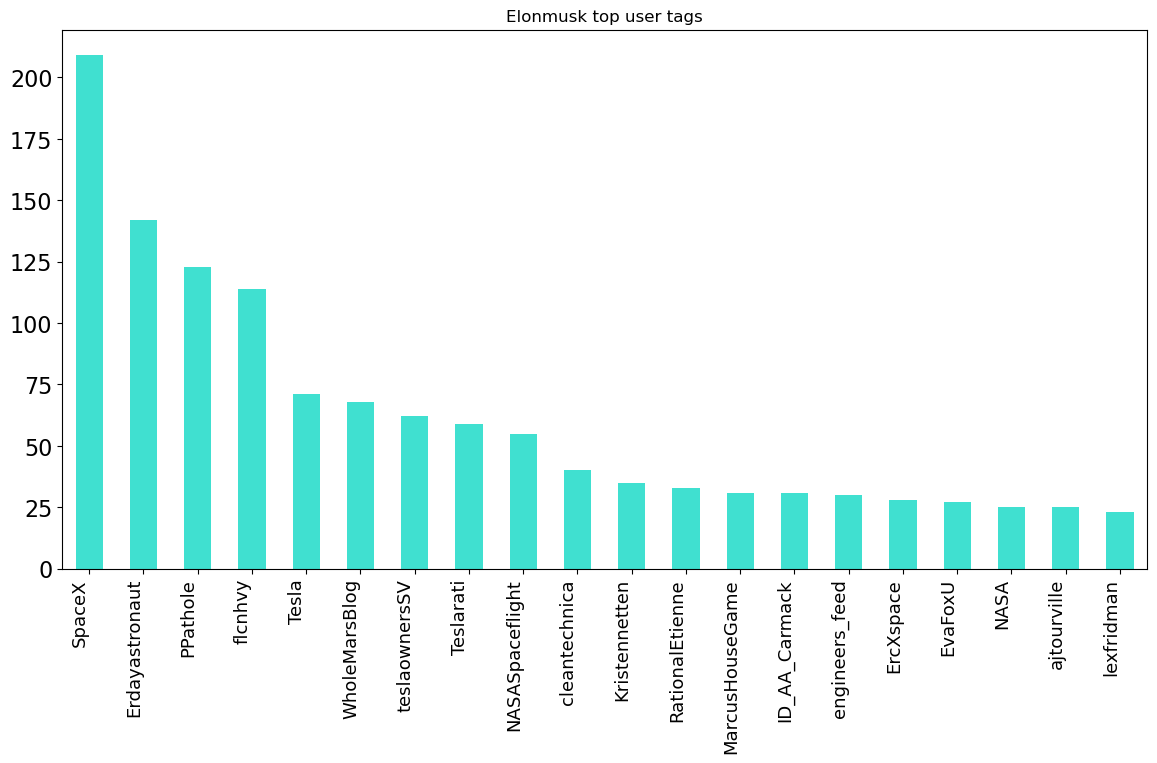

In [4]:
#Data exploration 
import itertools
c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(':','')[1:] for handle in t.split(' ')
                                                    if '@' in handle.replace(':','')]).tolist()))
pd.Series(c).value_counts().head(20).plot.bar(figsize=(14,7), fontsize = 16,color='turquoise')
plt.gca().set_title('Elonmusk top user tags', fontsize=12)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=13)
pass

In [5]:
#Text preprocessing
#remove unecessary data
def clean_text(text):
    text = text.lower()
    text = re.sub('\/[.?*]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)
tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [6]:
#checking word frequency
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:30]
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
ppathole          123
i                 117
flcnhvy           114
with              108
are               100
at                 93
you                91
yes                86
and                84
not                77
Name: count, dtype: int64

In [7]:
# removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#check the frequency after stopping words
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:30] 
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
much                40
first               39
one                 39
like                38
true                35
probably            35
kristennetten       35
rationaletienne     33
make                33
also                33
Name: count, dtype: int64

## Feature extraction

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(tweets['Text'])
word_freqdf = pd.DataFrame({'term':vectorizer.get_feature_names_out(),'occurences': np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freqdf['frequency'] = word_freqdf['occurences']/np.sum(word_freqdf['occurences'])
word_freqdf.head(10)

,term,occurences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


## TFIDF - Term frequency inverse Document Frequency

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec = vectorizer.fit_transform(tweets['Text'])
name_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns=name_features)
df

,able,abort,absolutely,access,accurate,achieve,actual,actually,adamklotz,add,...,year,years,yes,yesterdays,youd,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-gram and Bi-gram
## N-grams are contiguous sequences of items that are collected from a sequence of text or speech corpus or almost any type of data

In [14]:
def get_top_n1_words(corpus, n=None):
    # Initialize a CountVectorizer to extract bigrams
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) 
    # Transforming the corpus into a bag-of-words representation of bigrams
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    # Create a list of tuples containing bigram and its frequency
    words_freq = [(word,sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
top_words = get_top_n1_words(tweets["Text"], n=200) #top 200
top_df = pd.DataFrame(top_words)
top_df.columns = ["Bi-gram", "Freq"]
top_df.head(10)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


## plotting the bigram

[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'spacex falcon'),
 Text(2, 0, 'erdayastronaut spacex'),
 Text(3, 0, 'pretty much'),
 Text(4, 0, 'rt nasa'),
 Text(5, 0, 'waemd spacex'),
 Text(6, 0, 'giga berlin'),
 Text(7, 0, 'first stage'),
 Text(8, 0, 'teslaratiteam teslarati'),
 Text(9, 0, 'nasa spacex'),
 Text(10, 0, 'falcon first'),
 Text(11, 0, 'erdayastronaut flcnhvy'),
 Text(12, 0, 'flcnhvy tesla'),
 Text(13, 0, 'coming soon'),
 Text(14, 0, 'spacex dragon'),
 Text(15, 0, 'static fire'),
 Text(16, 0, 'crew dragon'),
 Text(17, 0, 'thesheetztweetz waemd'),
 Text(18, 0, 'astrobehnken astrodoug'),
 Text(19, 0, 'next year'),
 Text(20, 0, 'falcon launch'),
 Text(21, 0, 'great game'),
 Text(22, 0, 'next month'),
 Text(23, 0, 'wholemarsblog yes'),
 Text(24, 0, 'course still'),
 Text(25, 0, 'still love'),
 Text(26, 0, 'next week'),
 Text(27, 0, 'tobyliiiiiiiiii erdayastronaut'),
 Text(28, 0, 'one day'),
 Text(29, 0, 'rt tesla')]

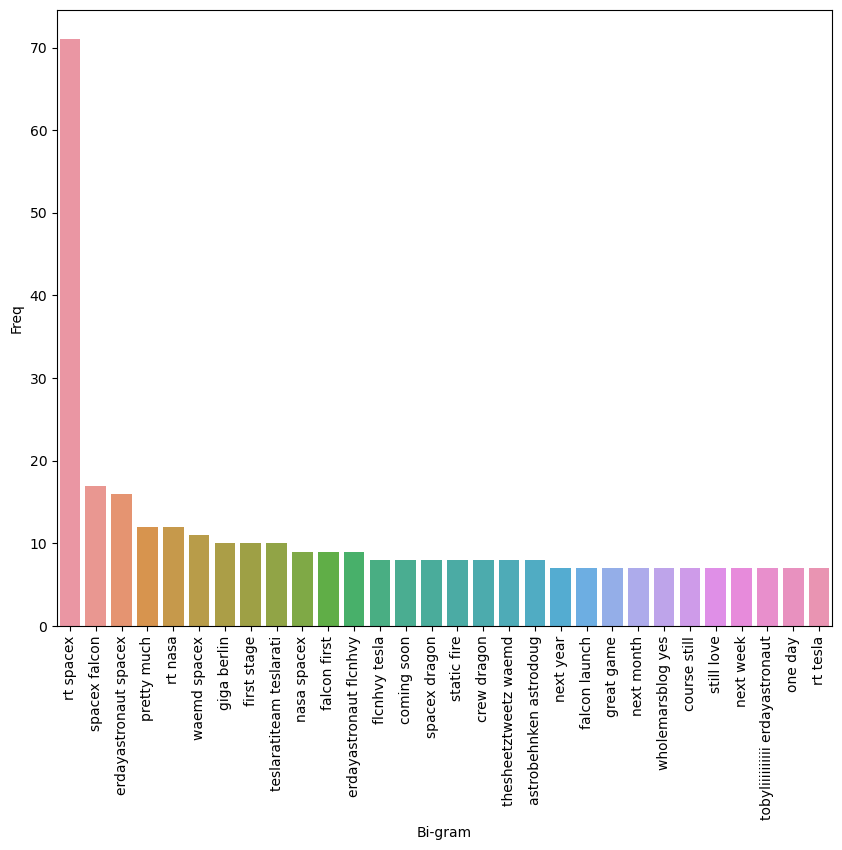

In [19]:
top30_bigram = top_df.iloc[0:30,:]
fig = plt.figure(figsize=(10,8))
plot = sns.barplot(x = top30_bigram['Bi-gram'],y= top30_bigram['Freq'])
plot.set_xticklabels(rotation = 90,labels = top30_bigram['Bi-gram'])

## Tri-gram
## It is a three-word sequence of words like “please turn your”, or “turn your homework"

In [21]:
def get_top_n2_words(corpus, n=None):
    # Initialize a CountVectorizer to extract bigrams
    vec1 = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus) 
    # Transforming the corpus into a bag-of-words representation of bigrams
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    # Create a list of tuples containing bigram and its frequency
    words_freq = [(word,sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
top2_words = get_top_n2_words(tweets["Text"], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Tri-gram", "Freq"]
top2_df.head(10)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


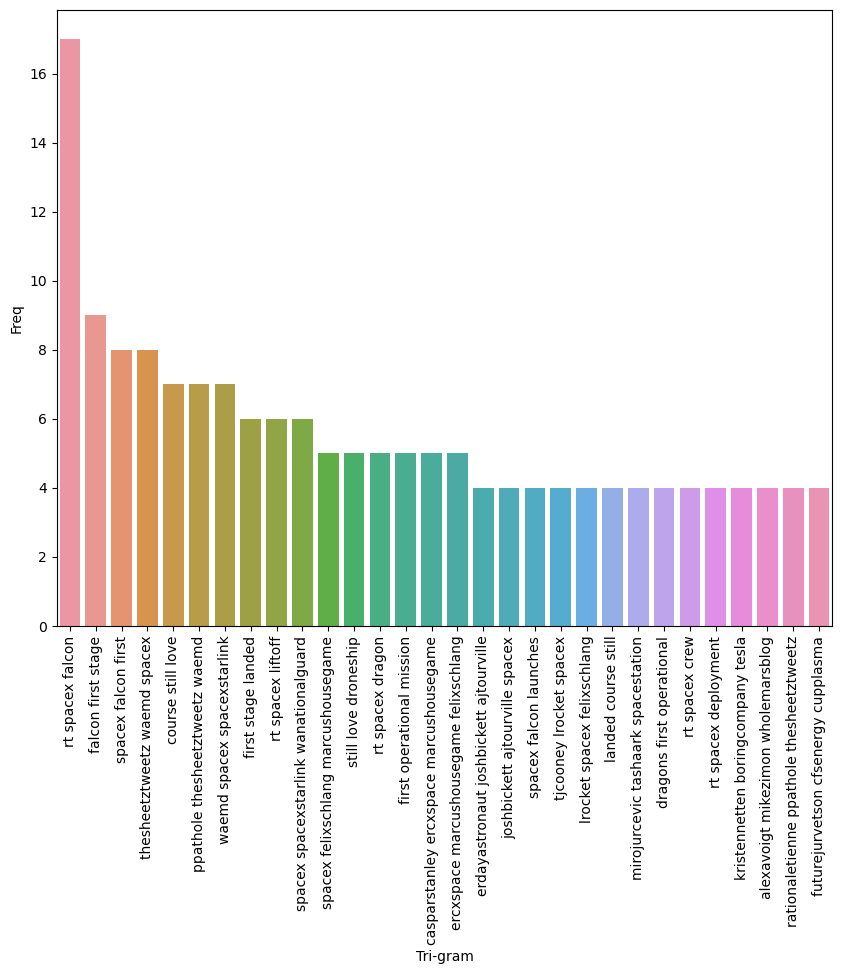

In [24]:
#ploting the tri-gram
top30_trigram = top2_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 8))
plot = sns.barplot(x=top30_trigram["Tri-gram"],y=top30_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top30_trigram["Tri-gram"]);

## creating wordcloud

In [25]:
string_Total = " ".join(tweets["Text"])

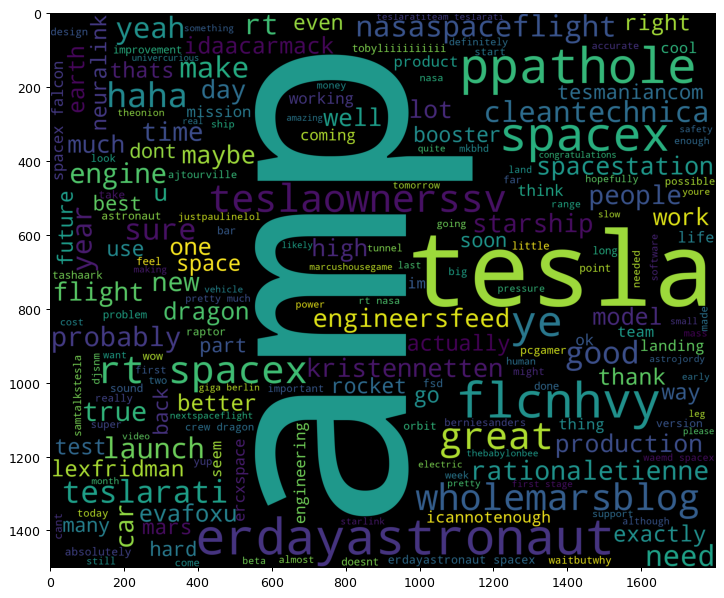

In [29]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(10,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [27]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [34]:
#Subjectivity and Polarity
# Get The Subjectivity
from textblob import TextBlob
def sentiment_analysis(ds):xxx
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


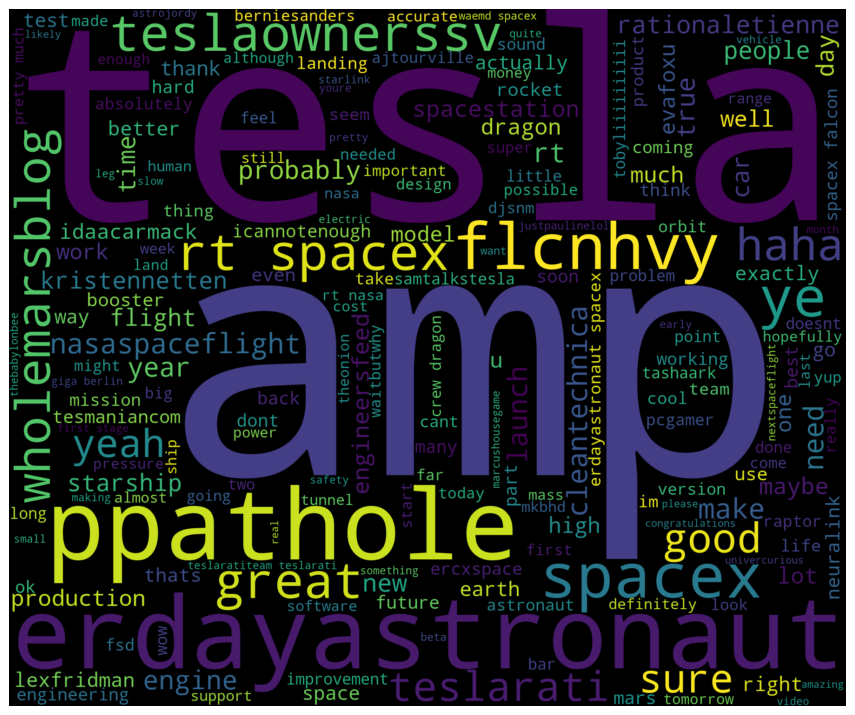

In [35]:
allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [36]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [37]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [38]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


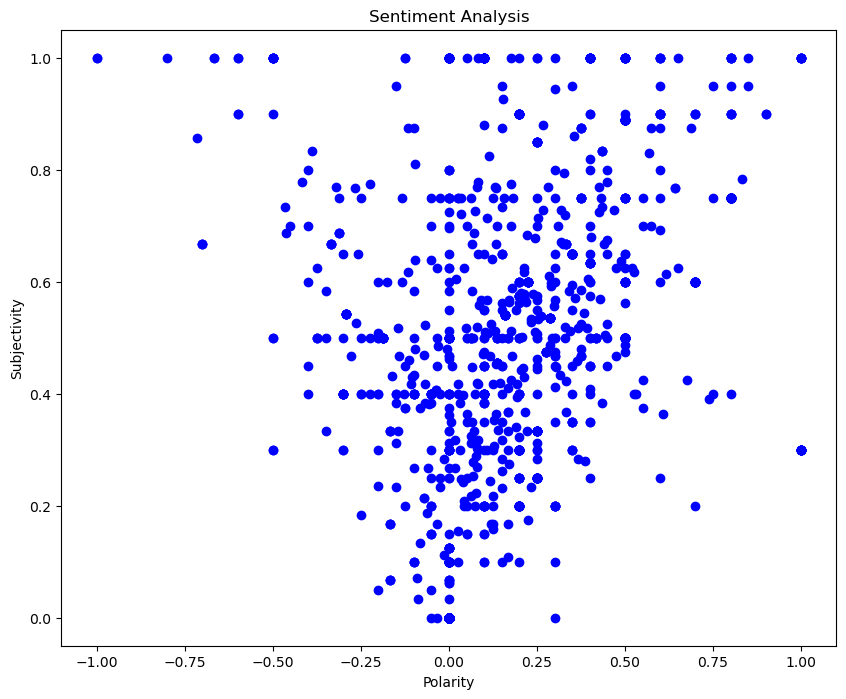

In [39]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "blue")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph